In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class KMeansClustering():
    def __init__(self, x, num_clusters):
        self.K = num_clusters
        self.plot_figure = True
        self.max_iterations = 100
        self.num_examples, self.num_features = x.shape
    
    def initialize_random_centroids(self, x):
        centroids = np.zeros((self.K, self.num_features))
        
        for k in range(self.K):
            centroid = x[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid
            
        return centroids
    
    def create_clusters(self, x, centroids):
        clusters = [[] for _ in range(self.K)]
        
        for point_idx, point in enumerate(x):
            closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2,  axis = 1)))
            clusters[closest_centroid].append(point_idx)
        return clusters
    
    def calculate_new_centroids(self, clusters, x):
        centroids = np.zeros((self.K, self.num_features))
        
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(x[cluster], axis = 0)
            centroids[idx] = new_centroid
        return centroids
    
    def predict_cluster(self, clusters, x):
        y_pred = np.zeros(self.num_examples)
        
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    def plot_fig(self, x, y):
        plt.scatter(x[:, 0], x[:, 1], c=y, s = 40, cmap=plt.cm.Spectral)
        plt.show()
    
    def fit(self, x):
        centroids = self.initialize_random_centroids(x)
        
        for it in range(self.max_iterations):
            clusters = self.create_clusters(x, centroids)
            
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, x)
            
            diff = centroids - previous_centroids
            
            if not diff.any():
                print('kmeans has converged, criterion satisfied')
                break
                
        y_pred = self.predict_cluster(clusters, x)
    
        if self.plot_figure:
            self.plot_fig(x, y_pred)
        return y_pred

kmeans has converged, criterion satisfied


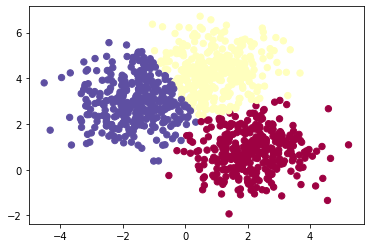

In [5]:
if __name__ == '__main__':
    np.random.seed(0)
    num_clusters = 3
    x, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters)
    
    Kmeans = KMeansClustering(x, num_clusters)
    y_pred = Kmeans.fit(x)